In [3]:
## Import libraries and set working directory as well
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
data_dir=('/Users/Tony/Desktop/Logistic Regression')
os.chdir(data_dir)

In [4]:
# We will read in the direct marketing data
data=pd.read_csv("dm.csv",na_values=[""," ","NA","N/A"])

In [5]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [6]:
# The marketer decided that a good customer is someone who spends more than average
# We need to create a column in our dataset which will have labels for good customers and bad customers
# We will represent a good customer with a label 1, and a bad customer with a label 0
# We can use the map and lambda fucntion

data['target']=data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [10]:
# We can then drop the AmountSpent column
data=data.drop("AmountSpent", axis=1)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [11]:
# 1 = good customer
# 0 = bad customer
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [12]:
# Let's take a look at the count values of the "History" variable
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [13]:
# Let's check on missing values for the same variable 'History'
# We need to do something about the 303 missing values
# It could be that these customers are new and have no history with the company
data['History'].isnull().sum()

303

In [14]:
## Minimal data preparation
# Hence we can create another label for the missing values in history as new customer 'NewCust'
data['History']=data['History'].fillna("NewCust")

In [15]:
# If we take a look again to the 'History' value counts 
# The additional category NewCust has been created in the column 'History'
data['History'].value_counts()

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [16]:
## Split the data into test and train
# We will run our model in data_train, and validate it in data_test
# 200 in the random_state it means 200 is a seed that will make this sample reproducible 
data_train=data.sample(frac=0.70, random_state=200)
data_test=data.drop(data_train.index)

In [17]:
## To build and explore our model let's import more libraries
# Statsmodels api is needed to run the LOGISTIC REGRESSION as per the LINEAR REGRESSION
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [26]:
# In this model we do not know which predictors will be good or not to predict if a customer is a good one or not
# Of course I cannot use the CustID so I will drop it from the list (not included)
# To build a LOGISTIC REGRESSION in Python we use the fucntion .glm (generalized linear models) from the statsmodels
# When we use the attribute family and add Binomial, python understands we want to build 
# a BINARY LOGIT Log regression model
# Binary because we are only modeling two classes in the model; GOOD and BAD customers
# target variable is the dependent variable and all the others are independent 
# The C in front of certain independent variables mark the fact they are categorical and not continuous

model1=smf.glm("target~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+Children+C(History)+Catalogs",data=data,
               family=sm.families.Binomial()).fit()

In [27]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.72
Date:                Tue, 10 Dec 2019   Deviance:                       475.44
Time:                        13:28:41   Pearson chi2:                     614.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -6.69

In [ ]:
# The coefficient estimates are about the log of the ODDS RATIO of the probability of the event
# The event here is wheter a customer will be a good customer or not

In [ ]:
# Looking at the P-values we see that some of these variables turn out to be insignificant (pvalue very high)

In [ ]:
# In the next iteration of the model I need to take out those variables which are not significant
# One way is to manually replace these variables in the next iteration of the model

In [28]:
# What we need to do now is to get rid of the labels, but how? Since Age, History etc are factor variables
# We will have to create DUMMY VARIABLES
# We will create dummies only for those variables for which the model shows some significance
# I will create dummy variables for the level medium in the 'History' column

# I can create this using get_dummies in pandas or using map and lambda fucntions
# We will create dummy variables both in the data_train and data_test set

data_train['Hist_Med']=data_train['History'].map(lambda x: 1 if x=="Medium" else 0)
data_test['Hist_Med']=data_test['History'].map(lambda x: 1 if x=="Medium" else 0)

In [29]:
# We now include the dummy variables in our model and run it again
model2=smf.glm("target~Children+Catalogs+Salary+Hist_Med", data=data_train,
              family=sm.families.Binomial()).fit()

In [30]:
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      695
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.08
Date:                Tue, 10 Dec 2019   Deviance:                       438.16
Time:                        14:38:26   Pearson chi2:                     641.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4955      0.556    -11.688      0.0

In [ ]:
# If I observe the model now, all the coefficient estimates are turning out to be significant
# I also see that there is no mismatch with the signs as I should expect younger people 
# to purchase less and be bad customers
# I also expect people with kids to buy less from me because of the nature of my business
# The coefficient make sense considering their signs, 
# as the # of Catalogs customers go through and Salaries should have a positive impact on the buying behaviour

In [31]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics

In [ ]:
## Once I build my model what I need to do is to obtain predictions from my model
# To do so I will use predict function on model 2

In [32]:
# I am making the prediction on the test data instead of the training data
# as I wanna use my model object built on a different dataset(data_train) and obtain prediction 
# for a different dataset(data_test)
y_true=data_test['target']
y_pred=model2.predict(data_test)

In [33]:
# Here I get the probability that for a given set of attributes, would a customer be a good or a bad one
# We will get this value for every single record in the data

# There is a 13% chance that the first observation of my data would correspond to a good customer
# which means that he/she is likely a bad customer according to the model

# There is a 87% chance that the 8th observation in my data would correspond to a good customer
y_pred.head()

0     0.133072
2     0.112537
6     0.088037
7     0.875422
10    0.124423
dtype: float64

In [34]:
## Another thing we can do is to take a look at the CONFUSION MATRIX
# The way I compute such matrix is by using confusion_matrix command from the matrix module of sklearn
# The first argument of this class is actual class label, the 2nd argument is predicted class label
# The map and lambda function here specifies that out of the two class labels that I have in my data 
# which one is to be trated as a positive class label
# Since I am making prediction for good customers and for good customers I have reserved the label 1
# I am supplying greater that 0.5 as 1(x>0.5)

y_true=data_test['target']
y_pred=model2.predict(data_test).map(lambda x:1 if x>0.5 else 0)
metrics.confusion_matrix(y_true,y_pred)

array([[159,  15],
       [ 20, 106]])

In [35]:
# This above is my confusion matrix, and i can see that my model is predicting 159 customers as BAD 
# which are actually also BAD customers
# There is an error of only 20 customers
# I can also see my model predicting 106 as GOOD customers, and misclassifying 15 as Bad customers 
# which are actually good customers

# Looking at these numbers I can make an assessment that my model is doing a decent job!

In [36]:
## ROC CURVE
# We can look at another performance matrix called ROC curve (Receiver Operating Curve)
# To do this we can use the roc_curve function in the matrix model in sklearn 

y_score=model2.predict(data_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1), np.arange(0,1.1,0.1)

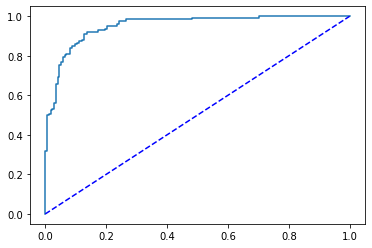

In [39]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

In [ ]:
# The ROC curve tells us how good our model is compared to random chance
# Our model here seems to be doing much better than random chance 

In [40]:
## AUC

# We can also take a look at the AUC
# AUC stand for 'Area Under the ROC Curve', it measure the entire 2d area under the entire ROC curve
# AUC provides an aggregate measure of performance across all possible classification thresholds 
# AUC should be greater than 50%
# AUC in our case is 95% indicating our model is optimum
metrics.roc_auc_score(y_true,y_score)

0.9516967706622879

In [ ]:
## GAINS

# Once we have looked at the performance matrix, we will use now this LOGISTIC REGRESSION model to do
# customer targeting
# We have built this logistic model to predict which customer will be GOOD and which will be BAD
# The LOGISTIC REGRESSION model usually take certain attributes as INPUTS, and produces a probability score
# In this case my model take some inputs and gives me a probability score if the customer will be G or B

# The question is: what range of probabilities score given by my model would make sure I am able to target maximum 
# number of good customers? Is there a way to do this? YES THERE IS
# We can do a GAIN CHART to do this kind of analysis

# Let's try to understand the intuition behind the GAIN chart (gain excel)

# I have a LOGISTIC REGRESSION model with me and I also have a file of data which has the same attributes
#that I use BY THE LOGISTIC REGRESSION model to make the predictions
# Let's say these attributes are V1, V2, V3. This dataset also has class labels in terms of who is a GOOD customer
# and who is a BAD customer, coded as 1,0 (X=1,0)
# I use my LOGISTIC REGRESSION model to produce probabilities based on these attributes in my data (V1,V2,V3)
# Once I produce these probabilities, for some rows I will have high prob scores, for some other low prob scores
# What I'll do next, is to arrange my data based on these probabilities scores in such a way that the first row
# of my data becomes the row which has the highest probability
# Essentially what I am doing is that of arranging my data based on the probability scores in a descending order
# If my model is good, for the observation for which I have high prob scores there should be more occurences
# of GOOD customers, or more occurences of 1s
# So going down with my file, my prob scores will decrease and so will my occurences of 1s. So my model is good

# What we do is, instead of dividing our data into 2 equal parts, we'll divide it into 10 equal parts
# then we look at the number of occurences of events in each of these equal parts
# if my model is good, in the first few groups of my data I should be able to capture maximum # of events

# This is what a GAIN chart displays
# Let's see how to produce a GAIN chart in Python!

In [41]:
# When I use predict I get a column probability scores from our data
data_test['prob']=model2.predict(data_test)

In [42]:
data_test['prob'].head()

0     0.133072
2     0.112537
6     0.088037
7     0.875422
10    0.124423
Name: prob, dtype: float64

In [43]:
# Usually we divide our data into 10 equal parts when we produce a GAIN chart
# We can do so using the pandas .qcut function
data_test['prob_deciles']=pd.qcut(data_test['prob'],q=10)

In [44]:
data_test.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0,0,0.133072,"(0.107, 0.24]"
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0,0,0.112537,"(0.107, 0.24]"
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,804,0,1,0.088037,"(0.0507, 0.107]"
7,Middle,Male,Own,Single,Close,68400,0,High,18,790,0,0,0.875422,"(0.754, 0.898]"
10,Young,Male,Rent,Married,Close,43700,1,NewCust,12,157,0,0,0.124423,"(0.107, 0.24]"


In [45]:
# The next task is to sort the probabilities into a descending order
data_test.sort_values('prob',ascending=False).head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
901,Old,Female,Own,Married,Far,128700,0,High,24,1164,1,0,0.999451,"(0.965, 0.999]"
386,Old,Male,Own,Married,Close,123000,0,High,24,584,1,0,0.999168,"(0.965, 0.999]"
928,Old,Male,Own,Married,Close,168800,0,High,6,1286,1,0,0.999086,"(0.965, 0.999]"
216,Middle,Female,Rent,Married,Far,120800,1,High,24,1227,1,0,0.997484,"(0.965, 0.999]"
504,Old,Female,Own,Married,Close,118800,0,High,18,1276,1,0,0.996444,"(0.965, 0.999]"


In [46]:
# Then I use a groupby on the deciles variable we created in the data_test
# Now we want the total events of the occurences of 1s and the tot number of observations for deciles
gains=data_test.groupby("prob_deciles", as_index=False)['target'].agg(['sum','count']).reset_index().sort_values('prob_deciles',ascending=False)

In [ ]:
# From these 2 columns we can also calculate the % of events and cumulative events for each decile

In [47]:
gains.columns=["Deciles","TotalEvents","NumberObs"]

In [48]:
gains["PercEvents"]=gains['TotalEvents']/gains['TotalEvents'].sum()

In [49]:
gains["CumulativeEvents"]=gains.PercEvents.cumsum()

In [50]:
# Let's check the gain chart
gains

,Deciles,TotalEvents,NumberObs,PercEvents,CumulativeEvents
9,"(0.965, 0.999]",30,30,0.238095,0.238095
8,"(0.898, 0.965]",29,30,0.230159,0.468254
7,"(0.754, 0.898]",24,30,0.190476,0.658730
6,"(0.515, 0.754]",23,30,0.182540,0.841270
5,"(0.24, 0.515]",11,30,0.087302,0.928571
4,"(0.107, 0.24]",7,30,0.055556,0.984127
3,"(0.0507, 0.107]",1,30,0.007937,0.992063
2,"(0.026, 0.0507]",0,30,0.000000,0.992063
1,"(0.0108, 0.026]",1,30,0.007937,1.000000
0,"(-0.000415, 0.0108]",0,30,0.000000,1.000000


In [ ]:
# Here I can see that the first 10 observations range across the probability scores, contain 23.8% of good customers
# The first 20 observations ranging across the prob scores, contain 46.8% of good customers
# The first 30 contain 65.8% of good customers

# Is this good news? YES
# If I trust my model then the top 30% of the probability scores would be 66% of the tot good customers in my pop.

# If I have a new data file, I can use the attributes in that data file to score that file
# and if I choose the observation corresponding to the top 30% probabilities I'll be assured I;ll be able to target
# 65.8% of good customers

# I can see that the top 10 probability scores lie between 0.965 and 0.999 
# top 20% probability scores lie between 0.898 and 0.965
# top 30% probability scores lie between 0.754 and 0.898

# After I identify which probability scores constitute top 30% of the prob scores I can subset my data based on these 
# probability scores, and identify the customers ID

# Let's do that

In [51]:
# I can sort the values in the test data using the column prob which consists of predictor probabilities
# and the customer IDs column which correspond to these observations that have top 30% probability scores
# I can use .head(90) to look at the top 90 customers for the first 3 deciles

# These are the people to target, THE GOOD CUSTOMERS THE COMPANY SHOULD TARGET
data_test.sort_values("prob", ascending=False)[['Cust_Id']].head(90)

,Cust_Id
901,1164
386,584
928,1286
216,1227
504,1276
263,571
351,1275
887,789
84,231
625,1050
